In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sns
%matplotlib inline
from scipy.stats import zscore,spearmanr
from sklearn.cluster import KMeans 

In [ ]:
# Reading the Dataframe
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NIO/dataFishNewIn.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL,Current Sp,Tide,Wind spe,Temperature,label
0,840,88.251681,861.328125,352.193885,26.869224,290.551995,0.107793,0.891084,0.147917,121.741351,120.049537,115.572434,7.530,1.64,0.607333,29.266,scia
1,855,94.311016,732.128906,349.741479,27.316954,288.400600,0.361470,0.897462,0.142868,125.267049,124.462998,116.182654,8.471,1.54,0.462667,29.222,scia
2,870,93.597116,861.328125,351.349077,27.216269,289.446729,0.271624,0.894944,0.145730,125.249877,124.397613,116.397882,8.502,1.43,0.637333,29.256,scia
3,885,94.147293,861.328125,351.027752,26.660596,290.034240,0.187662,0.894372,0.154119,125.212633,124.511974,115.631092,10.639,1.32,0.778000,29.263,scia
4,900,93.720958,861.328125,355.876209,26.729999,293.423045,0.248323,0.894582,0.146458,125.403830,124.630878,116.046655,11.503,1.20,1.071333,29.280,scia


In [ ]:
X=df.drop(['Current Sp','Tide','Wind spe','Temperature','label'],axis=1)
y = df[['label']]

In [ ]:
print('Shape of X values:',X.shape)
print('Shape of label y values:',y.shape)

Shape of X values: (351, 12)
Shape of label y values: (351, 1)


In [ ]:
y.value_counts()

label 
inv1      98
scia      79
tera      65
inv2      35
shrimp    27
typeA     26
plankt    21
dtype: int64

#### Spearman

In [ ]:
spear,pval=spearmanr(X)

In [ ]:
pval

array([[0.00000000e+000, 4.69466532e-061, 5.09530495e-021,
        2.58981263e-042, 3.76238752e-028, 1.03410264e-042,
        3.66028646e-051, 3.72282808e-003, 9.42157120e-004,
        3.14906599e-072, 8.17892270e-068, 2.80772341e-053],
       [4.69466532e-061, 0.00000000e+000, 4.34344767e-059,
        4.17147506e-045, 2.41967182e-062, 3.87179761e-042,
        1.41431120e-083, 2.37723834e-009, 5.21495084e-004,
        2.72830492e-178, 2.89447602e-166, 1.98837096e-075],
       [5.09530495e-021, 4.34344767e-059, 0.00000000e+000,
        3.43931735e-016, 6.04579649e-020, 4.79689261e-015,
        5.24520094e-033, 4.53585842e-005, 9.97075317e-005,
        3.84925524e-040, 6.62625724e-046, 2.40599179e-013],
       [2.58981263e-042, 4.17147506e-045, 3.43931735e-016,
        0.00000000e+000, 3.29439749e-059, 2.02351502e-318,
        2.04071686e-038, 1.80209450e-001, 3.26363850e-002,
        1.49899814e-059, 6.78415813e-066, 1.08739722e-039],
       [3.76238752e-028, 2.41967182e-062, 6.04579649

In [ ]:
col = ['Time','Peak frequency','Wide_ACI','Fish_ACI','Shrimp_ACI','Wide_AEI','Fish_AEI','Shrimp_AEI','Wide band_SPL','Fish band_SPL','shrimp band_SPL']
heat_spear=pd.DataFrame(spear,index=col,columns=col)
heat_spear

,Time,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL
Time,1.000000,-0.473550,-0.642858,-0.541655,-0.645239,0.691172,0.154451,0.175779,0.777304,0.761911,0.701464
Peak frequency,-0.473550,1.000000,0.416885,0.461828,0.401738,-0.580505,-0.215883,0.206202,-0.629506,-0.663572,-0.377701
Wide_ACI,-0.642858,0.416885,1.000000,0.728140,0.992275,-0.618422,-0.071693,-0.114074,-0.729587,-0.754834,-0.626650
Fish_ACI,-0.541655,0.461828,0.728140,1.000000,0.668745,-0.583457,-0.076387,-0.020711,-0.767117,-0.777037,-0.599885
Shrimp_ACI,-0.645239,0.401738,0.992275,0.668745,1.000000,-0.617464,-0.068749,-0.148177,-0.713840,-0.738340,-0.634904
Wide_AEI,0.691172,-0.580505,-0.618422,-0.583457,-0.617464,1.000000,0.459093,0.305162,0.812987,0.826502,0.649593
Fish_AEI,0.154451,-0.215883,-0.071693,-0.076387,-0.068749,0.459093,1.000000,0.179967,0.261614,0.293994,0.009617
Shrimp_AEI,0.175779,0.206202,-0.114074,-0.020711,-0.148177,0.305162,0.179967,1.000000,0.185205,0.158365,0.373306
Wide band_SPL,0.777304,-0.629506,-0.729587,-0.767117,-0.713840,0.812987,0.261614,0.185205,1.000000,0.986355,0.857594
Fish band_SPL,0.761911,-0.663572,-0.754834,-0.777037,-0.738340,0.826502,0.293994,0.158365,0.986355,1.000000,0.804428


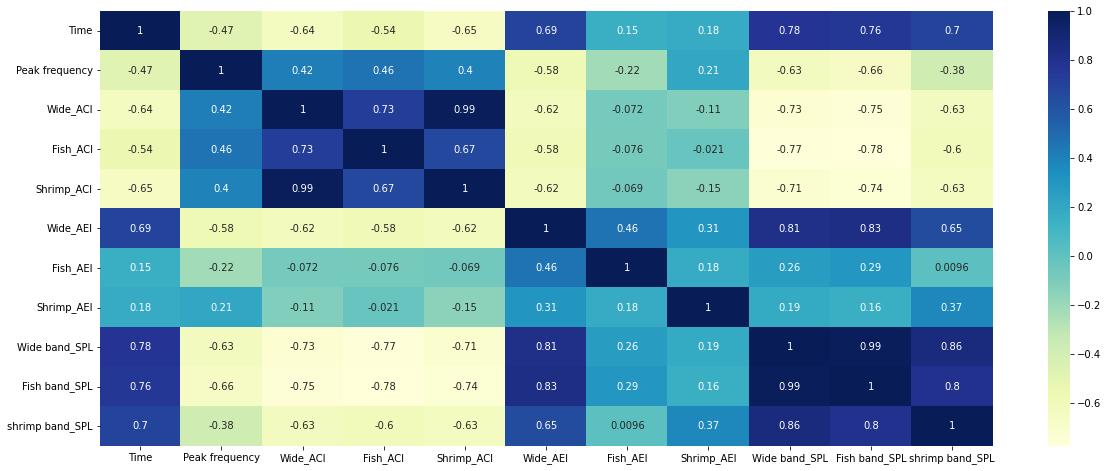

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(heat_spear,cmap="YlGnBu", annot=True)
plt.savefig('/content/drive/MyDrive/NIO/images/heatmap1.png')
plt.show()

In [ ]:
# Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(spear)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 3.21131437e-01  2.24100058e-02  4.53997288e-02 -2.16126189e-01
  -5.62155599e-01  5.13318141e-01 -4.49496228e-01 -2.48108516e-01
  -6.27949596e-02 -2.31241662e-02  1.91514840e-03]
 [-2.47874926e-01  2.39331002e-01  4.88435238e-01  3.18762654e-01
   1.36942189e-01  6.26277187e-01  8.60033899e-02  2.96513430e-01
   1.85867007e-01 -1.56953756e-02 -3.75723041e-03]
 [-3.33335836e-01  1.80631411e-01 -2.06676786e-01 -4.82022141e-01
   1.60228355e-01  1.45271347e-01 -7.60581755e-02  4.22315683e-02
   2.72960592e-02 -1.32967392e-01 -7.13041536e-01]
 [-3.12139993e-01  2.17950604e-01 -4.70638283e-02 -1.45763357e-01
  -7.07965551e-01 -1.38431421e-01  4.75041378e-01  1.26505726e-01
   2.47340835e-01  2.84872488e-02  8.69982585e-02]
 [-3.28943265e-01  1.50098693e-01 -2.28332992e-01 -4.72431776e-01
   2.62274369e-01  1.84475618e-01 -1.55589699e-01  1.80794174e-02
   2.68571416e-02  7.73035289e-02  6.78150214e-01]
 [ 3.34698477e-01  2.44333694e-01 -1.93595264e-01 -2.57721381e-02
 

In [ ]:
tot = 0
for i in eig_vals:
  tot = tot + i
print(tot)
# eig_vals
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("Variance",var_exp)

11.000000000000005
Cumulative Variance Explained [ 59.55092709  71.36759388  82.22894812  88.34858297  92.27523582
  95.57095067  97.68508749  99.25226938  99.90070163  99.9693336
 100.        ]
Variance [59.550927086733765, 11.816666794931386, 10.86135424203447, 6.1196348460079255, 3.926652847386767, 3.295714857241663, 2.11413681095421, 1.5671818969497593, 0.6484322428800245, 0.068631970862154, 0.030666404017884435]


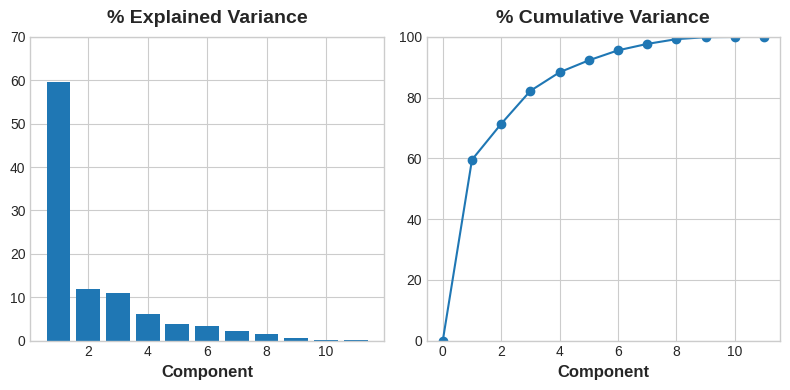

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

width=8 
dpi=100
 # Create figure
fig, axs = plt.subplots(1, 2)
n = 11
grid = np.arange(1, n + 1)
    # Explained variance
evr = var_exp
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 70.0))
    # Cumulative Variance
cv = cum_var_exp
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 100.0))
    # Set up figure
fig.set(figwidth=8, dpi=100)
plt.show()

In [ ]:
# Taking only 6 Principal components
sVT = eig_vecs[:,:6].T
sXT=X.T.values
sZ=np.dot(sVT,sXT)

In [ ]:
component_names = [f"PC{i+1}" for i in range(6)]
S_pca_df = pd.DataFrame(sZ.T.tolist(), columns=component_names)
S_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-36.326080,351.307585,333.048626,-299.014648,-192.077976,1107.803225
1,5.178673,320.229415,271.117848,-342.699231,-218.219095,1034.498783
2,-22.869600,351.910761,334.426146,-306.084516,-208.340043,1123.583566
3,-18.212288,352.069624,334.859285,-309.071828,-216.333192,1131.334352
4,-15.876545,353.856373,333.842810,-316.474790,-223.065370,1140.432009


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


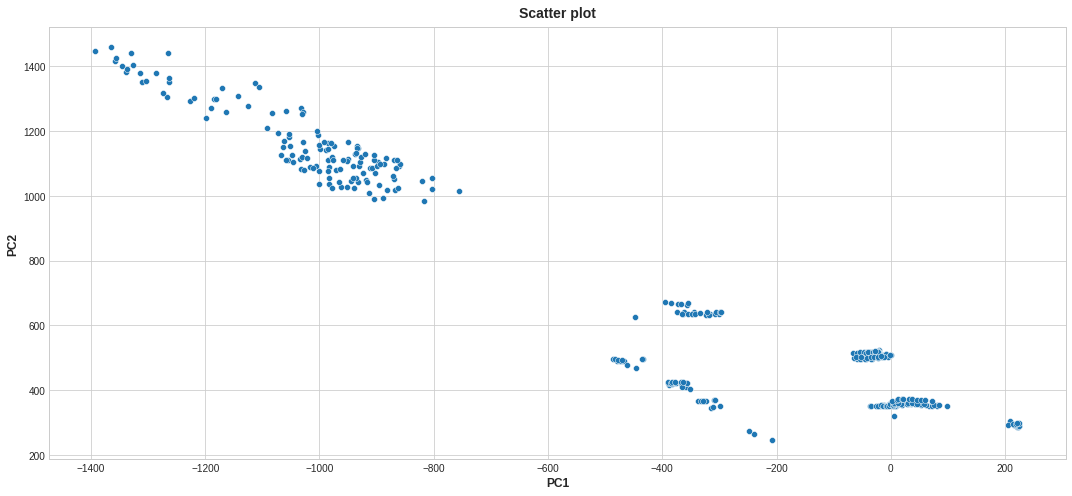

In [ ]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(S_pca_df['PC1'],S_pca_df['PC2'])
plt.show()

In [ ]:
df_z = zscore(S_pca_df)

In [ ]:
distortions = []
labels = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_z)
    distortions.append(kmeanModel.inertia_)
l = kmeanModel.labels_

In [ ]:
df_z['labels'] = l

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


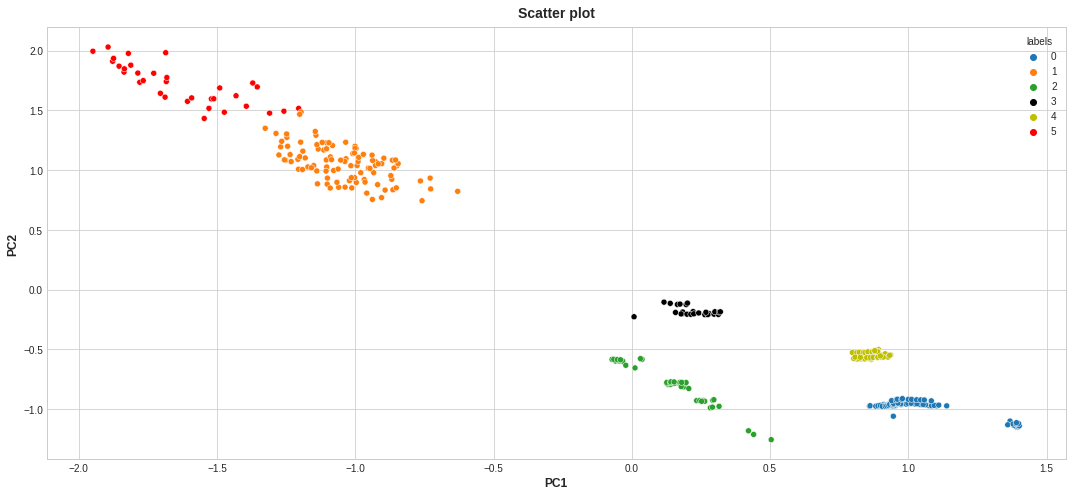

In [ ]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(df_z['PC1'],df_z['PC2'],hue = df_z['labels'],palette=["C0", "C1", "C2", 'k','y','r'])
# plt.save
plt.show()

#### 191 dataset

In [ ]:
df.head()

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL,Current Sp,Tide,Wind spe,Temperature,label
0,840,88.251681,861.328125,352.193885,26.869224,290.551995,0.107793,0.891084,0.147917,121.741351,120.049537,115.572434,7.530,1.64,0.607333,29.266,scia
1,855,94.311016,732.128906,349.741479,27.316954,288.400600,0.361470,0.897462,0.142868,125.267049,124.462998,116.182654,8.471,1.54,0.462667,29.222,scia
2,870,93.597116,861.328125,351.349077,27.216269,289.446729,0.271624,0.894944,0.145730,125.249877,124.397613,116.397882,8.502,1.43,0.637333,29.256,scia
3,885,94.147293,861.328125,351.027752,26.660596,290.034240,0.187662,0.894372,0.154119,125.212633,124.511974,115.631092,10.639,1.32,0.778000,29.263,scia
4,900,93.720958,861.328125,355.876209,26.729999,293.423045,0.248323,0.894582,0.146458,125.403830,124.630878,116.046655,11.503,1.20,1.071333,29.280,scia


In [ ]:
X=df.drop(['Current Sp','Tide','Wind spe','Temperature'],axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             351 non-null    int64  
 1   Db               351 non-null    float64
 2   Peak frequency   351 non-null    float64
 3   Wide_ACI         351 non-null    float64
 4   Fish_ACI         351 non-null    float64
 5   Shrimp_ACI       351 non-null    float64
 6   Wide_AEI         351 non-null    float64
 7   Fish_AEI         351 non-null    float64
 8   Shrimp_AEI       351 non-null    float64
 9   Wide band_SPL    351 non-null    float64
 10  Fish band_SPL    351 non-null    float64
 11  shrimp band_SPL  351 non-null    float64
 12  label            351 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 35.8+ KB


In [ ]:
X=X[~(X['label']=='inv1')]

In [ ]:
X=X[~(X['label']=='inv2')]

In [ ]:
X=X[~(X['label']=='shrimp')]

In [ ]:
X.shape

(191, 13)

In [ ]:
X_ = X.drop(['label'],axis=1)
y = X[['label']]

In [ ]:
y.value_counts()

label 
scia      79
tera      65
typeA     26
plankt    21
dtype: int64

#### Spearman

In [ ]:
spear,pval=spearmanr(X_)

In [ ]:
pval

array([[0.00000000e+000, 3.19107346e-041, 4.57870287e-001,
        1.99340105e-019, 1.52996384e-006, 1.32465146e-021,
        4.41202776e-036, 9.66533224e-003, 2.26304878e-011,
        6.91021014e-039, 1.35929191e-037, 7.92929596e-029],
       [3.19107346e-041, 0.00000000e+000, 1.30118782e-002,
        1.13550256e-036, 3.05656754e-022, 2.34831647e-038,
        4.70469137e-062, 2.07047186e-004, 6.60877122e-015,
        1.63839586e-157, 1.05238261e-171, 1.71606241e-045],
       [4.57870287e-001, 1.30118782e-002, 0.00000000e+000,
        1.22543451e-006, 4.79298338e-013, 7.41140243e-006,
        2.94940313e-003, 1.00420823e-001, 5.86934160e-015,
        3.55682186e-003, 7.53526585e-003, 3.31576292e-006],
       [1.99340105e-019, 1.13550256e-036, 1.22543451e-006,
        0.00000000e+000, 1.15472022e-033, 2.81033438e-178,
        6.47916726e-024, 7.26330154e-001, 6.73023510e-012,
        4.70383912e-043, 4.16771460e-041, 6.69363669e-045],
       [1.52996384e-006, 3.05656754e-022, 4.79298338

In [ ]:
col = ['Time','Db','Peak frequency','Wide_ACI','Fish_ACI','Shrimp_ACI','Wide_AEI','Fish_AEI','Shrimp_AEI','Wide band_SPL','Fish band_SPL','shrimp band_SPL']
heat_spear=pd.DataFrame(spear,index=col,columns=col)
heat_spear

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL
Time,1.000000,0.785345,0.054031,-0.591710,-0.339674,-0.619205,0.752212,0.186806,0.459593,0.770975,0.762536,0.694480
Db,0.785345,1.000000,0.179413,-0.756300,-0.626764,-0.767553,0.876953,0.265377,0.524728,0.988640,0.991974,0.809026
Peak frequency,0.054031,0.179413,1.000000,-0.342607,-0.492166,-0.317906,0.214023,0.119228,0.525582,0.209945,0.192803,0.329212
Wide_ACI,-0.591710,-0.756300,-0.342607,1.000000,0.734567,0.993166,-0.645691,0.025489,-0.470216,-0.795891,-0.784657,-0.805931
Fish_ACI,-0.339674,-0.626764,-0.492166,0.734567,1.000000,0.689522,-0.475625,-0.126974,-0.308858,-0.673397,-0.670123,-0.560728
Shrimp_ACI,-0.619205,-0.767553,-0.317906,0.993166,0.689522,1.000000,-0.666160,0.033380,-0.502983,-0.804064,-0.791475,-0.832549
Wide_AEI,0.752212,0.876953,0.214023,-0.645691,-0.475625,-0.666160,1.000000,0.468762,0.598488,0.870128,0.870174,0.739937
Fish_AEI,0.186806,0.265377,0.119228,0.025489,-0.126974,0.033380,0.468762,1.000000,0.071168,0.210710,0.240797,-0.104293
Shrimp_AEI,0.459593,0.524728,0.525582,-0.470216,-0.308858,-0.502983,0.598488,0.071168,1.000000,0.545708,0.525071,0.708508
Wide band_SPL,0.770975,0.988640,0.209945,-0.795891,-0.673397,-0.804064,0.870128,0.210710,0.545708,1.000000,0.997527,0.851750


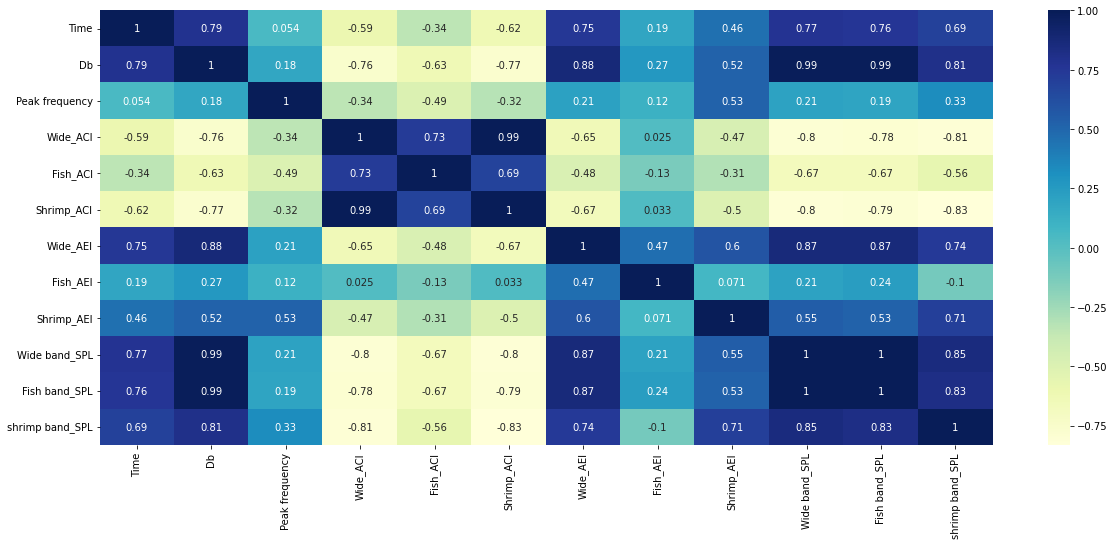

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(heat_spear,cmap="YlGnBu", annot=True)
plt.savefig('/content/drive/MyDrive/NIO/images/heatmap1.eps')
plt.show()

In [ ]:
# Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(spear)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.28317023 -0.26082369 -0.17867493 -0.23269203  0.30051714 -0.76643729
   0.29441937  0.00759399  0.00649826  0.03061981 -0.01559394 -0.00390421]
 [-0.34321742 -0.18692634 -0.06668408  0.04232205 -0.26977175 -0.02626096
  -0.20177853 -0.35417556  0.0103836  -0.7519852   0.0869124   0.16810044]
 [-0.13061938  0.47211806  0.63701892 -0.04227773  0.06036065 -0.39012577
  -0.43353678 -0.07090369  0.05220671  0.02016654 -0.00826155 -0.02095542]
 [ 0.31880538 -0.22813757  0.13881821 -0.23176651 -0.46411849 -0.19066814
  -0.01360955  0.13532392 -0.05813696 -0.15967011 -0.03508505 -0.68772572]
 [ 0.25919242 -0.24516809 -0.16321805 -0.56632929  0.34405285  0.12035464
  -0.5516338  -0.27411311 -0.06919199  0.08274405  0.00567179  0.03716413]
 [ 0.32201135 -0.21037351  0.16175459 -0.16001993 -0.49080853 -0.22074839
   0.01161973  0.12863863  0.01117945  0.15774917  0.0219473   0.68445855]
 [-0.31834442 -0.29651368  0.12651805 -0.13041053  0.06123652  0.18426116
  -0.2035279  

In [ ]:
tot = 0
for i in eig_vals:
  tot = tot + i
print(tot)
# eig_vals
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("Variance",var_exp)

12.00000000000001
Cumulative Variance Explained [ 63.53752965  75.20242451  85.12028325  92.30337302  94.96718212
  97.33278717  98.59169138  99.39123426  99.89823693  99.96224512
  99.99070123 100.        ]
Variance [63.53752964658981, 11.664894863243038, 9.91785874446581, 7.1830897697705955, 2.6638090947093422, 2.365605047417268, 1.25890421376076, 0.7995428772572009, 0.5070026709515654, 0.06400818690675271, 0.028456114521193402, 0.009298770406657442]


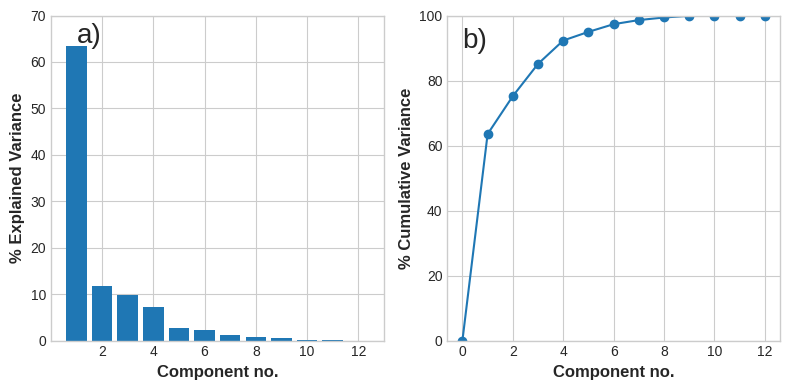

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

width=8 
dpi=100
 # Create figure
fig, axs = plt.subplots(1, 2)
n = 12
grid = np.arange(1, n + 1)
    # Explained variance
evr = var_exp
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component no.", ylabel="% Explained Variance", ylim=(0.0, 70.0))
axs[0].text(1,64,'a)',fontsize=20)
    # Cumulative Variance
cv = cum_var_exp
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component no.", ylabel="% Cumulative Variance", ylim=(0.0, 100.0))
axs[1].text(0,90,'b)',fontsize=20)
    # Set up figure
fig.set(figwidth=8, dpi=100)
plt.savefig('/content/drive/MyDrive/NIO/images/scree1.svg',format='svg',transparent=True)

In [ ]:
# Taking 4 eigen vectors
sVT = eig_vecs[:,:4].T
sXT=X_.T.values
sZ=np.dot(sVT,sXT)

In [ ]:
component_names = [f"PC{i+1}" for i in range(4)]
S_pca_df = pd.DataFrame(sZ.T.tolist(), columns=component_names)
S_pca_df.head()

,PC1,PC2,PC3,PC4
0,-290.063731,9.389912,448.950826,-383.939125
1,-283.918187,-56.815507,362.141168,-380.689705
2,-303.987023,-0.082108,442.181586,-390.205654
3,-308.231544,-4.127745,439.706816,-393.174904
4,-309.939532,-9.786306,438.184394,-398.474816


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


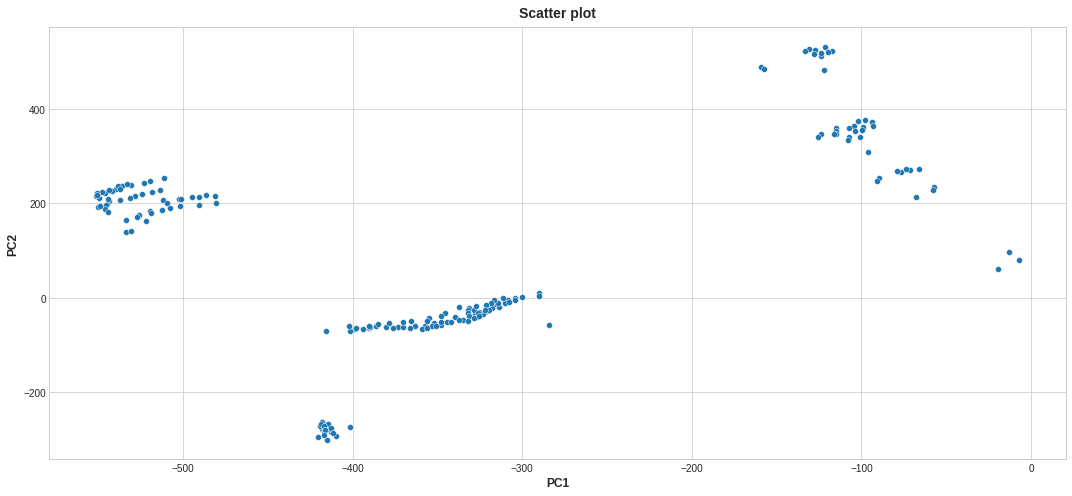

In [ ]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(S_pca_df['PC1'],S_pca_df['PC2'])
plt.show()

In [ ]:
# zscore
df_z = zscore(S_pca_df)

In [ ]:
distortions = []
labels = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_z)
    distortions.append(kmeanModel.inertia_)
l = kmeanModel.labels_

In [ ]:
df_z['labels'] = l

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


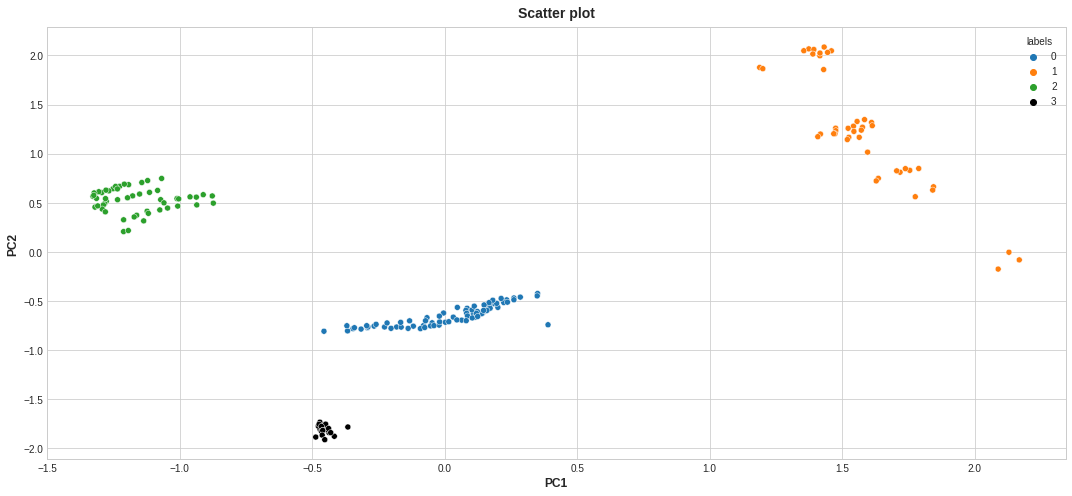

In [ ]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(df_z['PC1'],df_z['PC2'],hue = df_z['labels'],palette=["C0", "C1", "C2", 'k'])
# plt.save
plt.show()

In [ ]:
mark = []
for i in l:
  if i == 0:
    mark.append('o')
  elif i == 1:
    mark.append('*')
  elif i == 2:
    mark.append('x')
  # elif i == 3:
  #   mark.append('s')
  # elif i == 4:
  #   mark.append('^')
  # elif i == 5:
  #   mark.append('+')
  else:
    mark.append('d')
print(len(mark))

191


In [ ]:
from statsmodels.discrete.discrete_model import MultinomialResults
import matplotlib.lines as mlines
star = mlines.Line2D([], [],color="g", marker='*', linestyle='None',
                          markersize=10)
# square = mlines.Line2D([], [],color="black", marker='s', linestyle='None',
#                           markersize=10)
poly = mlines.Line2D([],[],color="y",marker="x",linestyle='None',
                          markersize=10)
# triangle = mlines.Line2D([], [],color="y", marker='^', linestyle='None',
#                           markersize=10)
circle = mlines.Line2D([], [],color="C0", marker='o', linestyle='None',
                          markersize=10)
diamond = mlines.Line2D([], [],color="m", marker='d', linestyle='None',
                          markersize=10)
# eight = mlines.Line2D([], [],color="r", marker='+', linestyle='None',
#                           markersize=10)

NameError: ignored

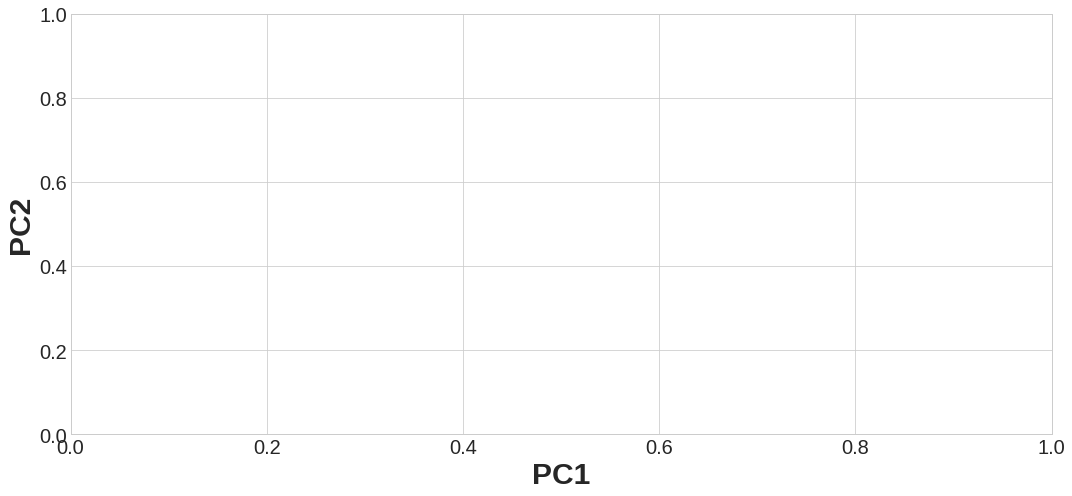

In [ ]:
m=mark
colors = ListedColormap(["C0", "C1", "C2", 'k','y','r','m'])
classes = ['Sciaenidae','Buzzy Sound','Tiger Perch','Planktivorous']

columns= ['Time(sec)','Peak(dB)','Peak frequency(Hz)','ACI','ACI','ACI','AEI','AEI','AEI','SPL','SPL','SPL']

def myplot(score,coeff,labels=None):
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())



    a4_dims = (15, 7)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax.set_xlabel('PC1',fontsize=30)
    ax.set_ylabel('PC2',fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=20)
    # plt.figure(figsize=(15 , 7))
    scatter = mscatter(df_z['PC1'], df_z['PC2'], c=df_z['labels'], cmap=colors, m=m, ax=ax,s=60)

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
# ax.xaxis.label.set_color('red')
# ax.tick_params(axis='x', colors='red')

    for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(4)

    ax.legend(handles =[circle,star,poly,diamond],labels = classes,fontsize=15)

    # plt.scatter(xs * scalex,ys * scaley,s=80)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],head_width=0.050, head_length=0.05,color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        elif i ==0 or i == 1 :
            plt.text(coeff[i,0]* 1.35, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i ==2:
            plt.text(coeff[i,0]* 1.9, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i == 3:
            plt.text(coeff[i,0]* 1.9, coeff[i,1] * 1.15, labels[i]+"$_{full-band}$", color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i ==6 or i ==9:
            plt.text(coeff[i,0]* 1.45, coeff[i,1] * 1.15, labels[i]+"$_{full-band}$", color = 'g', ha = 'center', va = 'top',fontsize=15)
        elif i == 4: 
            plt.text(coeff[i,0]* 1.45, coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'center', va = 'top',fontsize=15)
        elif i==7:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i==10:
            plt.text(coeff[i,0]* (-1.15), coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'left', va = 'center',fontsize=15)
        elif i==8:
            plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i]+"$_{shrimp-band}$", color = 'g', ha = 'left', va = 'top',fontsize=15)
        else:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.85, labels[i]+"$_{shrimp-band}$", color = 'g', ha = 'left', va = 'top',fontsize=15)

    # plt.xlabel("PC{}".format(1),fontsize=30)
    # plt.ylabel("PC{}".format(2),fontsize=30)
    # plt.tick_params(axis='both', which='major', labelsize=20)
    # plt.xlim(-0.9,0.9)
    # plt.ylim(-1.,1)
    # for axis in ['top','bottom','left','right']:
    #     ax.spines[axis].set_linewidth(4)
    # plt.grid()
    # plt.savefig('/content/drive/MyDrive/NIO/images/factor2d.png')

myplot(df_z.iloc[:,:2],np.transpose(eig_vecs[:2,:]),columns)
plt.show()








def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)





    if (m is not None) and (len(m)==len(x)):
        paths = []
        
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        
        sc.set_paths(paths)
        
    return sc

# plt.figure(figsize=(20 , 7))
# columns = X.columns.values

# t = 0
# for i in eig_vals:
#   t = t+i
# ratio =[]
# for i in eig_vals:
#   ratio.append(i/t)

# color = ['blue', 'red', 'green', 'black', 'purple', 'brown','magenta']



# a4_dims = (15, 7)
# fig, ax = plt.subplots(figsize=a4_dims)
# ax.set_xlabel('PC1',fontsize=30)
# ax.set_ylabel('PC2',fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)
# if len(eig_vecs[0]) > 7:
#     color=color*(int(len(eig_vecs[0])/7)+1)

# add_string=""
# for i in range(len(eig_vecs[0])):
#     xi=eig_vecs[0][i]
#     yi=eig_vecs[1][i]
#     plt.arrow(0,0, 
#               dx=xi, dy=yi, 
#               head_width=0.03, head_length=0.03, 
#               color=color[i], length_includes_head=True)
#     add_string=f" ({round(xi,2)} {round(yi,2)})"
#     plt.text(eig_vecs[0, i], 
#              eig_vecs[1, i] , 
#              s=columns[i] + add_string )
    

# scatter = mscatter(df_z['PC1'], df_z['PC2'], c=df_z['labels'], cmap=colors, m=m, ax=ax,s=60)
# ax.tick_params(width=4)
# ax.spines['bottom'].set_color('black')
# ax.spines['top'].set_color('black')
# ax.spines['left'].set_color('black')
# ax.spines['right'].set_color('black')
# # ax.xaxis.label.set_color('red')
# # ax.tick_params(axis='x', colors='red')

# for axis in ['top','bottom','left','right']:
#   ax.spines[axis].set_linewidth(4)


# handles = scatter.legend_elements(num=[0,1,2,3,4,5,6])[0]
# ax.legend(handles =[circle,star,poly,diamond],labels = classes,fontsize=15)
# plt.savefig('/content/drive/MyDrive/NIO/images/scatterplot2.png')
plt.show()

In [ ]:
mark = []
for i in l:
  if i == 0:
    mark.append('o')
  elif i == 1:
    mark.append('*')
  elif i == 2:
    mark.append('x')
  # elif i == 3:
  #   mark.append('s')
  # elif i == 4:
  #   mark.append('^')
  # elif i == 5:
  #   mark.append('+')
  else:
    mark.append('d')
print(len(mark))

191


In [ ]:
from statsmodels.discrete.discrete_model import MultinomialResults
import matplotlib.lines as mlines
star = mlines.Line2D([], [],color="C1", marker='*', linestyle='None',
                          markersize=20)
# square = mlines.Line2D([], [],color="black", marker='s', linestyle='None',
#                           markersize=20)
poly = mlines.Line2D([],[],color="C2",marker="x",linestyle='None',
                          markersize=20)
# triangle = mlines.Line2D([], [],color="y", marker='^', linestyle='None',
#                           markersize=10)
circle = mlines.Line2D([], [],color="C0", marker='o', linestyle='None',
                          markersize=20)
diamond = mlines.Line2D([], [],color="k", marker='d', linestyle='None',
                          markersize=20)
# eight = mlines.Line2D([], [],color="r", marker='+', linestyle='None',
#                           markersize=10)

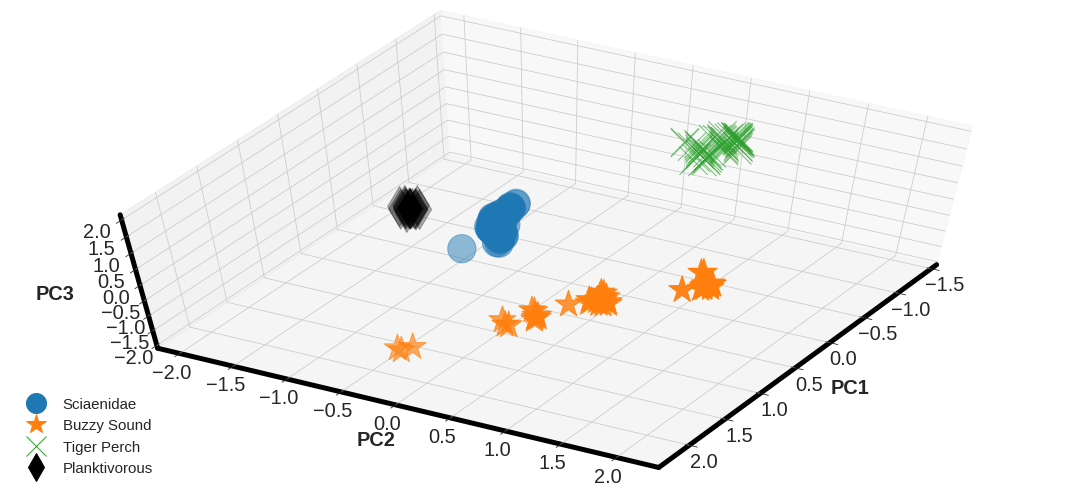

In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

m=mark
colors = ListedColormap(["C0", "C1", "C2", 'black'])
classes = ['Sciaenidae','Buzzy Sound','Tiger Perch','Planktivorous']

def mscatter(x,y,z,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,z,**kw)
    
    if (m is not None) and (len(m)==len(x)):
        paths = []
        
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        
        sc.set_paths(paths)
        
    return sc


fig = plt.figure(figsize=(15 , 7))
ax = fig.add_subplot(111, projection='3d')

# feature_names = X.columns

# xs = eig_vecs[0]
# ys = eig_vecs[1]
# zs = eig_vecs[2]
 
# # # Plot the loadings
# for i, varnames in enumerate(feature_names):
# #     ax.scatter(xs[i], ys[i], zs[i], s=400,alpha=0.25)
#     ax.text(
#         xs[i] + 0.1, 
#         ys[i] + 0.1, 
#         zs[i] + 0.1, 
#         varnames)
 
# # Plot the arrows
# x_arr = np.zeros(len(eig_vecs[0]))
# y_arr = z_arr = x_arr
# ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs,alpha=0.5)


scatter = mscatter(df_z['PC1'],df_z['PC2'],df_z['PC3'], c=df_z['labels'],cmap=colors, m=m,s=800, ax=ax)
ax.legend(handles =[circle,star,poly,diamond],labels = classes,loc="lower left",fontsize=15)
# ax.set(xlim=(-2.4,-0.5),ylim=(0.8,2.5),zlim=(-2.5,-0.7))
ax.set_xlabel('PC1',fontsize=20,labelpad=20)
ax.set_ylabel('PC2',fontsize=20,labelpad=20)
ax.set_zlabel('PC3',fontsize=20,labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=20)
for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(5)
    axis.line.set_color('black')

ax.azim = 30
ax.elev = 60
# for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)
plt.savefig('/content/drive/MyDrive/NIO/images/3dScatter1.svg',format='svg',transparent=True)
plt.show()
# 

In [ ]:
column = ['Time','Peak','Peak']


In [ ]:
X_

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL
0,840,88.251681,861.328125,352.193885,26.869224,290.551995,0.107793,0.891084,0.147917,121.741351,120.049537,115.572434
1,855,94.311016,732.128906,349.741479,27.316954,288.400600,0.361470,0.897462,0.142868,125.267049,124.462998,116.182654
2,870,93.597116,861.328125,351.349077,27.216269,289.446729,0.271624,0.894944,0.145730,125.249877,124.397613,116.397882
3,885,94.147293,861.328125,351.027752,26.660596,290.034240,0.187662,0.894372,0.154119,125.212633,124.511974,115.631092
4,900,93.720958,861.328125,355.876209,26.729999,293.423045,0.248323,0.894582,0.146458,125.403830,124.630878,116.046655
...,...,...,...,...,...,...,...,...,...,...,...,...
331,105,79.636554,1205.859375,380.383940,27.473335,317.413196,0.098778,0.894598,0.156466,115.603063,109.491798,113.531846
332,120,77.746644,1205.859375,378.535907,27.555574,315.604459,0.069500,0.889930,0.154817,115.360949,108.719916,113.403066
333,135,75.875152,1119.726563,378.166215,27.668378,314.958048,0.045824,0.893940,0.161124,114.800323,107.714756,112.946609
334,150,77.396134,1205.722656,371.807514,28.693808,308.454243,0.144953,0.891417,0.155847,114.856917,107.713662,112.952001


In [ ]:
columns = X_.columns.values

In [ ]:
columns= ['Time(sec)','Peak(dB)','Peak frequency(Hz)','ACI','ACI','ACI','AEI','AEI','AEI','SPL','SPL','SPL']

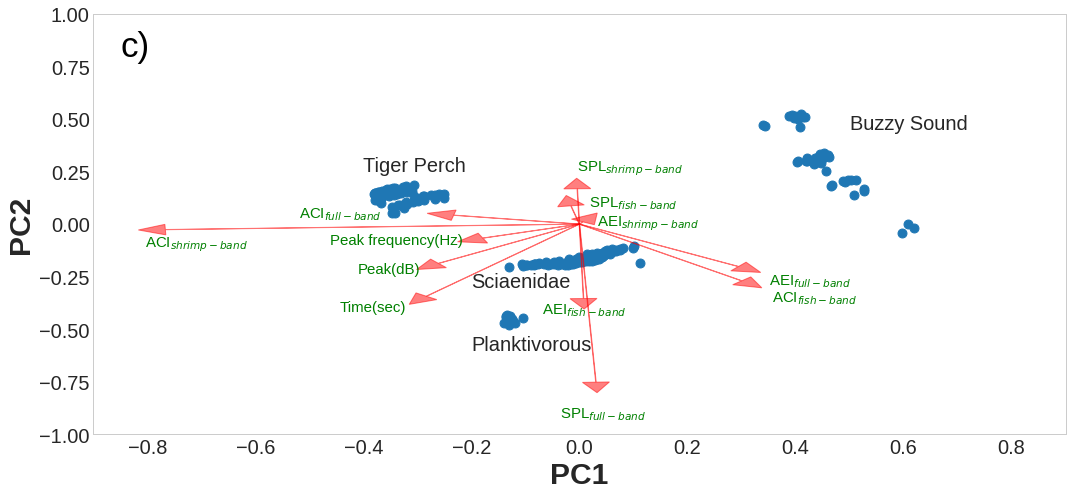

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(15 , 7))
    plt.scatter(xs * scalex,ys * scaley,s=80)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],head_width=0.050, head_length=0.05,color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        elif i ==0 or i == 1 :
            plt.text(coeff[i,0]* 1.35, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i ==2:
            plt.text(coeff[i,0]* 1.9, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i == 3:
            plt.text(coeff[i,0]* 1.9, coeff[i,1] * 1.15, labels[i]+"$_{full-band}$", color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i ==6 or i ==9:
            plt.text(coeff[i,0]* 1.45, coeff[i,1] * 1.15, labels[i]+"$_{full-band}$", color = 'g', ha = 'center', va = 'top',fontsize=15)
        elif i == 4: 
            plt.text(coeff[i,0]* 1.45, coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'center', va = 'top',fontsize=15)
        elif i==7:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i==10:
            plt.text(coeff[i,0]* (-1.15), coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'left', va = 'center',fontsize=15)
        elif i==8:
            plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i]+"$_{shrimp-band}$", color = 'g', ha = 'left', va = 'top',fontsize=15)
        else:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.85, labels[i]+"$_{shrimp-band}$", color = 'g', ha = 'left', va = 'top',fontsize=15)


 
    plt.xlabel("PC{}".format(1),fontsize=30)
    plt.ylabel("PC{}".format(2),fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(-0.9,0.9)
    plt.ylim(-1.,1)
    plt.text(-0.85,0.8,r"c)",fontsize=35,color='k')
    plt.text(-0.2,-0.30,'Sciaenidae',fontsize=20)
    plt.text(0.50,0.45,'Buzzy Sound',fontsize=20)
    plt.text(-0.2,-0.60,'Planktivorous',fontsize=20)
    plt.text(-0.4,0.25,'Tiger Perch',fontsize=20)
    # for axis in ['top','bottom','left','right']:
    #     ax.spines[axis].set_linewidth(4)
    plt.grid()
    plt.savefig('/content/drive/MyDrive/NIO/images/factor2d.svg',format='svg',transparent=True)

myplot(df_z.iloc[:,:2],np.transpose(eig_vecs[:2,:]),columns)
plt.show()

### Bar plot

In [ ]:
df.shape

(351, 17)

In [ ]:
df.columns

Index(['Time', 'Db', 'Peak frequency', 'Wide_ACI', 'Fish_ACI', 'Shrimp_ACI',
       'Wide_AEI', 'Fish_AEI', 'Shrimp_AEI', 'Wide band_SPL', 'Fish band_SPL',
       'shrimp band_SPL', 'Current Sp', 'Tide', 'Wind spe', 'Temperature',
       'label'],
      dtype='object')

In [ ]:
Spl_df = df[['Time','Wide band_SPL','Fish band_SPL','shrimp band_SPL']]
Spl_df.head()

,Time,Wide band_SPL,Fish band_SPL,shrimp band_SPL
0,840,121.741351,120.049537,115.572434
1,855,125.267049,124.462998,116.182654
2,870,125.249877,124.397613,116.397882
3,885,125.212633,124.511974,115.631092
4,900,125.403830,124.630878,116.046655


In [ ]:
c = 0
for i in Spl_df['Time']:
  if i == 840:
    c = c + 1
print(c)

4


In [ ]:
sm = 0
fs = 0
sp = 0
av = []
# count = 1
for i in range(len(Spl_df)):
  # print(i%4)
  if i%4 < 4:
    
    sm = sm+Spl_df['Wide band_SPL'][i] 
    fs = fs+Spl_df['Fish band_SPL'][i]
    sp = sp +Spl_df['shrimp band_SPL'][i]
  if i%4 ==3:
    av.append(sm/4)
    av.append(fs/4)
    av.append(sp/4)
    sm = 0
    fs = 0
    sp = 0
    



In [ ]:
sm = 0
fs = 0
sp = 0
av = []
for i in range(len(Spl_df)):
  for j in range(len()):
    if i%4==0:
      if Spl_df['Time'][j] == Spl_df['Time'][i]:
        print(Spl_df["Time"][i])


840
840
840
840
900
900
900
900
960
960
960
960
1020
1020
1020
1020
1080
1080
1080
1080
1140
1140
1140
1140
1200
1200
1200
1200
1260
1260
1260
1260
1320
1320
1320
1320
1380
1380
1380
1380
0
0
0
0
60
60
60
60
135
135
135
195
195
195
195
255
255
255
255
315
315
315
315
375
375
375
375
435
435
435
495
495
495
555
555
555
615
615
615
675
675
675
735
735
735
795
795
795
855
855
855
855
915
915
915
915
975
975
975
975
1035
1035
1035
1035
1095
1095
1095
1095
1155
1155
1155
1155
1215
1215
1215
1215
1275
1275
1275
1275
1335
1335
1335
1335
1395
1395
1395
1395
15
15
15
15
75
75
75
75
135
135
135
195
195
195
195
255
255
255
255
315
315
315
315
375
375
375
375
435
435
435
495
495
495
555
555
555
615
615
615
675
675
675
735
735
735
795
795
795
855
855
855
855
915
915
915
915
975
975
975
975
1050
1050
1050
1050
1110
1110
1110
1110
1170
1170
1170
1170
1230
1230
1230
1230
1290
1290
1290
1290
1350
1350
1350
1350
1410
1410
1410
1410
30
30
30
30
105
105
105
105
180
180
180
180
240
240
240
240
300
300
300


In [ ]:
len(av)/3

87.0

In [ ]:
aci_df = df[['Time','Wide_ACI','Fish_ACI','Shrimp_ACI']]
aci_df.shape

(351, 4)

In [ ]:
sm = 0
fs = 0
sp = 0
dv = []
# count = 1
for i in range(len(aci_df)):
  # print(i%4)
  if i%4 < 4:
    sm = sm+aci_df['Wide_ACI'][i] 
    fs = fs+aci_df['Fish_ACI'][i]
    sp = sp +aci_df['Shrimp_ACI'][i]
  if i%4 ==3:
    dv.append(sm/4)
    dv.append(fs/4)
    dv.append(sp/4)
    sm = 0
    fs = 0
    sp = 0
    


In [ ]:
dv

[351.07804834999996,
 27.015760569999998,
 289.6083909,
 356.547801875,
 26.773330599999998,
 294.784717775,
 362.06687305,
 27.247416335,
 300.028882675,
 365.218184725,
 26.52607316,
 303.6630682,
 348.1411041,
 26.216289305,
 287.980959575,
 330.25498375,
 25.980786487499998,
 270.328991025,
 324.14508275000003,
 25.7350933875,
 265.14754062500003,
 323.1611769,
 25.3485469225,
 264.7949204,
 328.181886975,
 25.4822391525,
 269.28111405,
 349.579559525,
 28.4232433875,
 286.67615695,
 358.173634925,
 27.18764341,
 296.50254605,
 364.871328125,
 26.675725155000002,
 303.4472192,
 365.71498470000006,
 27.922562125,
 303.149160175,
 361.2670565,
 28.254682672500003,
 299.12967835,
 369.44441904999996,
 29.407329909999998,
 305.32153855,
 364.537201275,
 28.772962137500002,
 302.312513825,
 362.45315375000007,
 28.981591545,
 298.9132133,
 356.921670525,
 28.152376789999998,
 295.19850855,
 365.86134835,
 28.55014624,
 302.43074535,
 368.159979475,
 29.4735229625,
 304.22800005,
 362.04

In [ ]:
aei_df = df[['Time','Wide_AEI','Fish_AEI','Shrimp_AEI']]
aei_df.head()

,Time,Wide_AEI,Fish_AEI,Shrimp_AEI
0,840,0.107793,0.891084,0.147917
1,855,0.361470,0.897462,0.142868
2,870,0.271624,0.894944,0.145730
3,885,0.187662,0.894372,0.154119
4,900,0.248323,0.894582,0.146458


In [ ]:
sm = 0
fs = 0
sp = 0
fv = []
# count = 1
for i in range(len(aei_df)):
  # print(i%4)
  if i%4 < 4:
    sm = sm+aei_df['Wide_AEI'][i] 
    fs = fs+aei_df['Fish_AEI'][i]
    sp = sp +aei_df['Shrimp_AEI'][i]
  if i%4 ==3:
    fv.append(sm/4)
    fv.append(fs/4)
    fv.append(sp/4)
    sm = 0
    fs = 0
    sp = 0
    


In [ ]:
fv

In [ ]:
time = []
for i in range(len(aei_df)):
  if i%4==3:
    time.append(str(aei_df['Time'][i])+'aei')
    time.append(str(aei_df['Time'][i])+'aci')
    time.append(str(aei_df['Time'][i])+'spl')


In [ ]:
aei_df['Time']

0      840
1      855
2      870
3      885
4      900
      ... 
346    330
347    345
348    360
349    375
350    390
Name: Time, Length: 351, dtype: int64

In [ ]:
time

['885aei',
 '885aci',
 '885spl',
 '945aei',
 '945aci',
 '945spl',
 '1005aei',
 '1005aci',
 '1005spl',
 '1065aei',
 '1065aci',
 '1065spl',
 '1125aei',
 '1125aci',
 '1125spl',
 '1185aei',
 '1185aci',
 '1185spl',
 '1245aei',
 '1245aci',
 '1245spl',
 '1305aei',
 '1305aci',
 '1305spl',
 '1365aei',
 '1365aci',
 '1365spl',
 '1425aei',
 '1425aci',
 '1425spl',
 '45aei',
 '45aci',
 '45spl',
 '120aei',
 '120aci',
 '120spl',
 '180aei',
 '180aci',
 '180spl',
 '240aei',
 '240aci',
 '240spl',
 '300aei',
 '300aci',
 '300spl',
 '360aei',
 '360aci',
 '360spl',
 '420aei',
 '420aci',
 '420spl',
 '480aei',
 '480aci',
 '480spl',
 '540aei',
 '540aci',
 '540spl',
 '600aei',
 '600aci',
 '600spl',
 '660aei',
 '660aci',
 '660spl',
 '720aei',
 '720aci',
 '720spl',
 '780aei',
 '780aci',
 '780spl',
 '840aei',
 '840aci',
 '840spl',
 '900aei',
 '900aci',
 '900spl',
 '960aei',
 '960aci',
 '960spl',
 '1020aei',
 '1020aci',
 '1020spl',
 '1080aei',
 '1080aci',
 '1080spl',
 '1140aei',
 '1140aci',
 '1140spl',
 '1200aei',
 

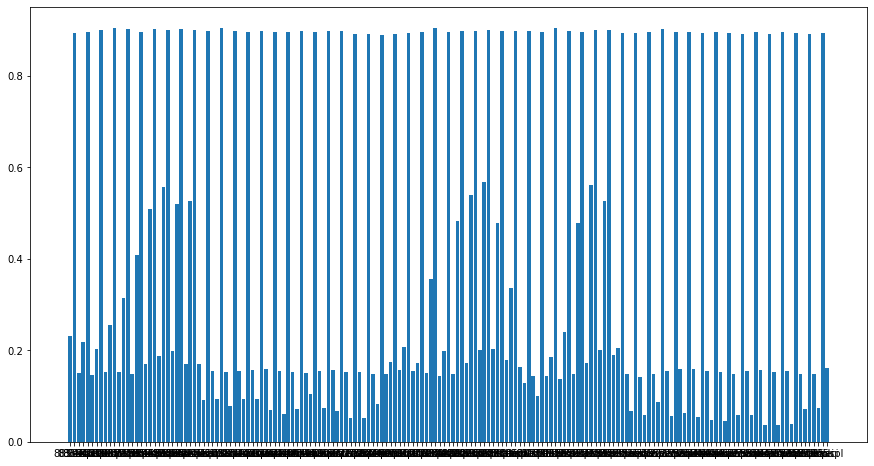

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(time,fv)
plt.show()

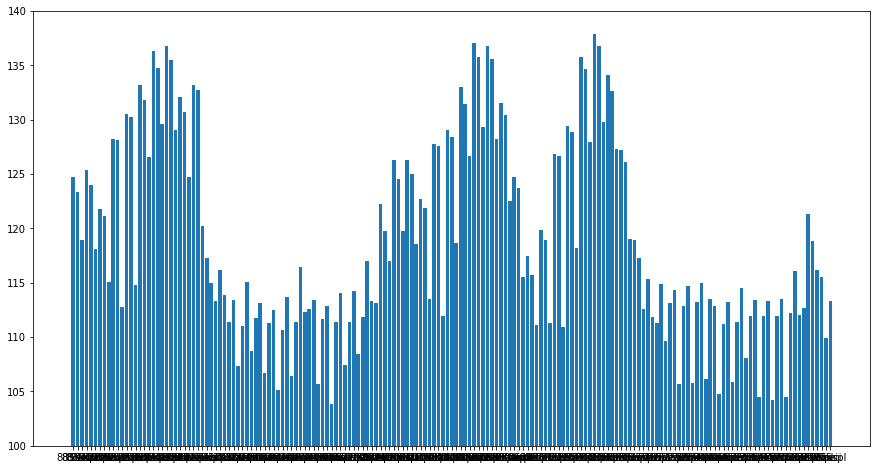

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(time,av)
plt.ylim(100,140)
plt.show()

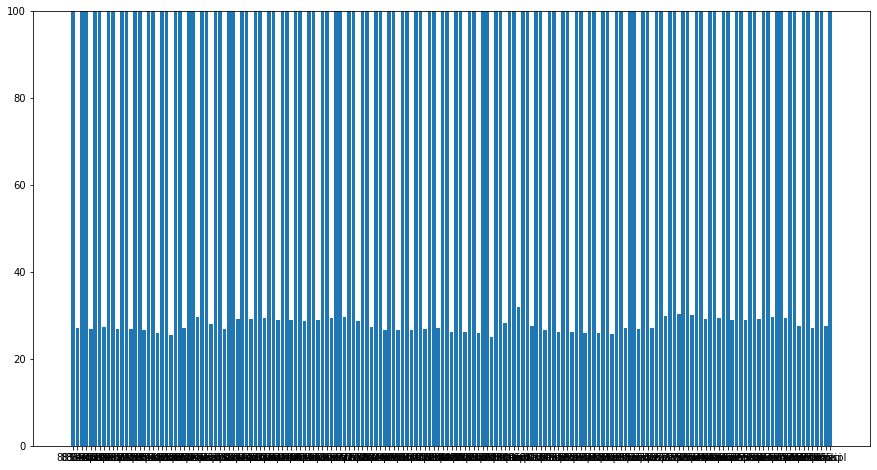

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(time,dv)
plt.ylim(0,100)
plt.show()

In [ ]:
df_z['labels'].value_counts()

In [ ]:
y.label.value_counts()

In [ ]:
# convert labels into integers
nums = {"label":{'scia':3,'tera':0,'typeA':1,'plankt':2}}
y = y.replace(nums)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y,df_z['labels'],labels=[3,0,1,2])

df_cm = pd.DataFrame(cm,index=[i for i in ['scia','tera','typeA','plankt']],
                     columns = [i for i in ['scia','tera','typeA','plankt']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
# plt.savefig('/content/drive/MyDrive/NIO/confusion.png')
plt.show()

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
# Go to the directory where your file is
%cd /content/drive/MyDrive/Colab\ Notebooks/

In [ ]:
!jupyter nbconvert --to pdf Pca11Column191Data.ipynb